%-------------------------------------------------------------------%| %-------------------------------------------------------------------%
- | - 
<img src="https://i.ibb.co/DtHQ3FG/802x265-Logo-GT.png" width="400"> | <img src="https://logodownload.org/wp-content/uploads/2014/07/btg-pactual-logo-1.png" width="400" >



## Grupo Turing
# Visão Computacional: Projeto de reconhecimento de rostos
#### Por: [Eduardo Eiras](https://github.com/dueiras); [Rodrigo Fill](https://github.com/rodrigofill); [Luísa Heise](https://github.com/luisaheise); [Paulo Sestini](https://github.com/paulosestini); [Rodrigo Estevam](https://github.com/materloki); [Victor Jinsi](); [Caio Netto]()

<img src='https://seac-rj.com.br/wp-content/uploads/2019/09/LeiGeraldeProte%C3%A7%C3%A3odeDados_optimized.jpg'>

Fonte: [Cartilha orienta sobre Lei Geral de Proteção de Dados (LGPD)](https://seac-rj.com.br/cartilha-orienta-sobre-lei-geral-de-protecao-de-dados-lgpd/)

### Ideia do projeto
&emsp;A área de visão computacional do Grupo Turing, com o apoio do BTG Pactual, desenvolve um algoritmo de reconhecimento facial em consonância com a, em breve vigente, lei geral de proteção de dados,  [LEI Nº 13.709, DE 14 DE AGOSTO DE 2018](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2018/lei/L13709.htm). A ideia do projeto é desenvolver ou adaptar métodos já disponíveis publicamente para que o tratamento de imagens de rostos seja feito de forma codificada.

### Motivação
&emsp;O trabalho hoje de reconhecimento facial com o auxílio de redes neurais treinadas para tal princípio já se tornou trivial, é possível instanciar algoritmos em computadores simples que fornecem resultados excelentes. Mas e quando a disposição de dados de rosto devem ser protegidas, como fazer para uma rede reconhecer uma imagem codificada? Ou como fazer para a rede codificar o resultado para que este esteja protegido? De fato existem inúmeras abordagens possíveis para o problema. Por exemplo: a proteção de dados como RG ou CPF é simples, existem algoritmos de **Hash** disponíveis e extremamente conhecidos há decadas, que possuem transformações injetoras, das quais não há volta e não é possível decodificar um dado passado pelo hash. 

&emsp;Por outro lado, como possivelmente conseguiriamos fazer algo semelhante para imagens, uma vez que não é suficiente apenas realizar a codificação, mas é necessário ser reconhecível com bom desempenho. Para tal a equipe desenvolve diferentes abordagens, de forma concomitante.

### Escopo

&emsp;O projeto visa criar um sistema que recebe uma foto do usuário e codifica essa informação com uma operação que não permita a reconstrução da imagem. Como pode haver inúmeras variáveis de condições das fotos, optou-se por limitar as opções de imagens a serem analisadas: 
>1. Rostos em posição frontal; 
2. Condição de iluminação parecida; 
3. Usuário com expressão neutra.

### Estratégia Inicial

&emsp;A abordagem inicial é tentar replicar um paper antigo, de 1996, chamado [Feature-Based Face Recognition Using Mixture-Distance](https://ieeexplore.ieee.org/document/517076), que categoriza rostos de pessoas com base em distâncias entre pontos do rosto. Neste paper essas distâncias são extraídas “a mão”, o que é totalmente inviável para nosso projeto. Tirando essas informações das imagens de forma automática (seja com ML ou com CV clássica), utilizaremos essas informações como código para definir a identidade da pessoa. Para tal, utilizou-se a biblioteca ***dlib***, associada com seus métodos de reconhecimento facial e uma rede treinada para extração de 68 *landmarks* da face, através do seguinte código:

In [16]:
#Import das bibliotecas necessárias nesta parte do projeto
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
detector = dlib.get_frontal_face_detector()  #Instancia do detector de rostos da dlib
predictor = dlib.shape_predictor("Data/shape_predictor_68_face_landmarks.dat")  #Instancia o preditor
#de landmarks da dlib

&emsp;Na célula abaixo está o código responsável por realizar a extração das *features* que serão utilizadas posteriormente, essas *features* são distâncias, calculadas entre dois pontos de interesse das *landmarks* extraídas do rosto. São, ao todo, 30 distâncias euclidianas, extraídas com base no paper citado acima, mais especificamente, com base nesta contrução:

Representação das distâncias em um rosto desenhado   |  Cálculo das respectivas distâncias
:-------------------------------------------------:|:-------------------------:
![ims/face.png](imgs/face.png) |  ![imgs/dist.png](imgs/dist.png)
Fonte: [[Feature-Based Face Recognition Using Mixt ure-Distance](https://ieeexplore.ieee.org/document/517076) | Fonte: [Feature-Based Face Recognition Using Mixt ure-Distance](https://ieeexplore.ieee.org/document/517076)

&emsp;Dessa forma foi proposto extrair essas features a partir de uma foto tirada de uma webcam. Algumas considerações importantes, se o modelo não consegue identificar o rosto, as *landmarks* não são expostas, consequentemente o cálculo da distância joga um erro. Como a distância é variável de acordo com a proximidade do rosto à câmera, decidiu-se utilizar uma como normalizadora das outras, no caso, a terceira: distância entre têmporas, por ser constituída majoritáriamente de osso, essa distância é razoavelmente invariante à expressão facial.

Novos pontos para nova imagem:



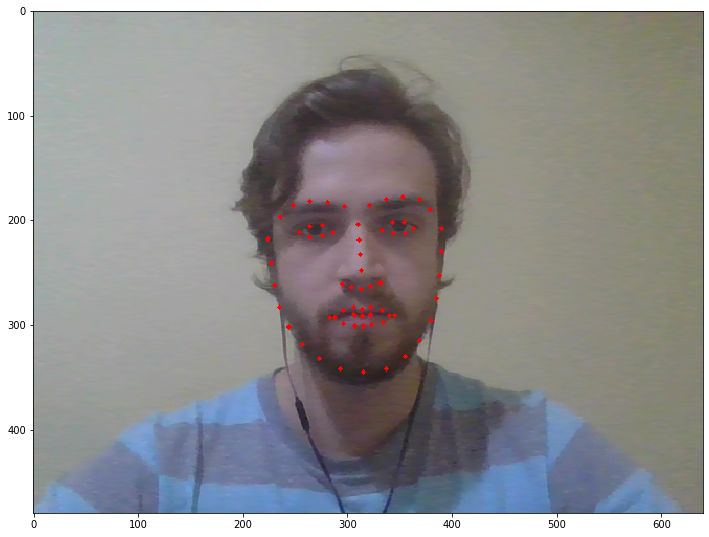

[ 0.2828204   0.06327493  1.          0.95162498  0.81859005  0.49322866
  0.24210113  0.24210113  0.37301204  0.03607917  0.0544518   0.2645806
  0.11440885  0.21655853  0.40437552  0.3904216   0.37921941  0.33058402
  0.14444191  0.87381064  0.5354443   0.24347017  0.21660026 -0.06013195
  0.29869444  0.26769557  0.36303967  0.3575703   0.73359522  0.25434048]




In [88]:
#Captura do frame da webcam
cap = cv2.VideoCapture(0)  #Captura facial para a execução do modelo
_, frame = cap.read()  #Salvamos o frame da captura
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  #Converte imagem BGR para GRAY

X = []
features = []

faces = detector(gray)  #Detecta o rosto na imagem em escala de cinza

#Agora que temos um frame do rosto detectado, vamos iterar sobre ele, buscando printar os 
#landmarks:
for face in faces:

    landmarks = predictor(gray, face)  #Encontra os landmarks no rosto

    print('Novos pontos para nova imagem:\n')

    for n in range(68):  #Loop para usar as coordenadas dos pontos para printar na tela
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        X.append((x, y))
        #print('Coordenada x: {}, Coordanada y: {}'.format(X[n][0], X[n][1]))
        cv2.circle(frame, (x, y), 2, (0, 0, 255), -1)

plt.figure(figsize=(12,12))
plt.imshow(frame[:, :, [2, 1, 0]])
plt.show()

X = np.array(X)

#Cálculo das 30 features mencionadas, com base no paper (estão em ordem como colocado lá)
features.append(0.5*(np.linalg.norm(X[42] - X[45])) + (np.linalg.norm(X[36] - X[39])))
features.append(0.5*(0.5*(np.linalg.norm(X[37] - X[41]) + np.linalg.norm(X[38] - X[40])) + (0.5*(np.linalg.norm(X[43] - X[47]) + np.linalg.norm(X[44] - X[46])))))
features.append(np.linalg.norm(X[0] - X[16])) 
features.append(np.linalg.norm(X[2] - X[14])) 
features.append(np.linalg.norm(X[4] - X[12])) 
features.append(np.linalg.norm(X[6] - X[10])) 
features.append(np.linalg.norm(X[6] - X[48]))
features.append(np.linalg.norm(X[10] - X[54]))
features.append(np.linalg.norm(X[48] - X[54]))
features.append(np.linalg.norm(X[62] - X[51]))
features.append(np.linalg.norm(X[66] - X[57]))
features.append(np.linalg.norm(X[57] - X[8]))   
features.append(np.linalg.norm(X[33] - X[51]))   
features.append(np.linalg.norm(X[31] - X[35]))  
features.append(0.5*(np.linalg.norm(X[0] - X[2])) + (np.linalg.norm(X[16] - X[14])))
features.append(0.5*(np.linalg.norm(X[2] - X[4])) + (np.linalg.norm(X[14] - X[12])))
features.append(0.5*(np.linalg.norm(X[4] - X[6])) + (np.linalg.norm(X[12] - X[10])))
features.append(0.5*(np.linalg.norm(X[39] - X[31])) + (np.linalg.norm(X[42] - X[45])))
features.append(np.linalg.norm(X[21] - X[22]))
features.append(0.5*(np.linalg.norm(X[17] - X[36])) + (np.linalg.norm(X[2] - X[9])))
features.append(0.5*(np.linalg.norm(X[17] - X[21])) + (np.linalg.norm(X[22] - X[26])))
features.append(0.5*(np.linalg.norm(X[39] - X[21])) + (np.linalg.norm(X[22] - X[42])))
features.append(0.5*(np.linalg.norm(X[37] - X[19])) + (np.linalg.norm(X[44] - X[24])))
features.append(X[19][1] - 0.5*(X[17][1] + X[21][1]))
features.append(0.5*(np.linalg.norm(X[19] - X[21])) + (np.linalg.norm(X[24] - X[22])))
features.append(0.5*(np.linalg.norm(X[19] - X[17])) + (np.linalg.norm(X[24] - X[26])))
features.append(np.linalg.norm(X[39] - X[33]))
features.append(np.linalg.norm(X[42] - X[33]))
features.append(0.5*(np.linalg.norm(X[42] - X[54])) + (np.linalg.norm(X[39] - X[48])))
features.append(0.5*(np.linalg.norm(X[0] - X[36])) + (np.linalg.norm(X[45] - X[16])))


features = np.array(features)
features = features/features[2]  #Normalização pela distância #3
print(features)
print('\n')
cap.release()



### Segundo Passo

&emsp;Após conseguir fazer a aquisição dos dados, foram propostos novos desafios, entre eles:

>1. Alinhar o rosto de forma automática
2. Gerar o arquivo com as distâncias para cada imagem do dataset
3. Utilizar as distâncias anteriores de forma eficiênte para classificação

A resposta para a primeira pergunta é simples, uma vez que já estamos implementando com a biblica dlib, a mesma disponíbiliza um método para alinhamento facial, implementou-se a seguinte função para a solução na resolução do problema, com base na implementação anterior:

### Primeiro problema

In [42]:
def marks(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray)
    fa = FaceAligner(predictor)  #objeto de alinhamento de rostos:
    for rect in rects:
        (x, y, w, h) = rect_to_bb(rect)
        frame = fa.align(frame,gray, rect) #Método de alinhamento de rostos
        #cv2.imshow("Aligned", frame)
        #cv2.waitKey()
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    X = []
    features = []

    #Implementalção similar à anterior
    faces = detector(gray)
    for face in faces:
        
        landmarks = predictor(gray, face)  #Encontra as landmarks do rosto
        
        print('Novos pontos para nova imagem:\n')

        for n in range(68):  #Loop para usar as coordenadas dos pontos para printar na tela
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            X.append((x, y))
            #print('Coordenada x: {}, Coordanada y: {}'.format(X[n][0], X[n][1]))
            cv2.circle(frame, (x, y), 3, (0, 0, 255), -1)
    
    #Cálculo das 30 features mencionadas, com base no paper (estão em ordem como colocado lá)
    X = np.array(X)
    if X != []:
        features.append(0.5*(np.linalg.norm(X[42] - X[45])) + (np.linalg.norm(X[36] - X[39])))
        features.append(0.5*(0.5*(np.linalg.norm(X[37] - X[41]) + np.linalg.norm(X[38] - X[40])) + (0.5*(np.linalg.norm(X[43] - X[47]) + np.linalg.norm(X[44] - X[46])))))
        features.append(np.linalg.norm(X[0] - X[16])) 
        features.append(np.linalg.norm(X[2] - X[14])) 
        features.append(np.linalg.norm(X[4] - X[12])) 
        features.append(np.linalg.norm(X[6] - X[10])) 
        features.append(np.linalg.norm(X[6] - X[48]))
        features.append(np.linalg.norm(X[10] - X[54]))
        features.append(np.linalg.norm(X[48] - X[54]))
        features.append(np.linalg.norm(X[62] - X[51]))
        features.append(np.linalg.norm(X[66] - X[57]))
        features.append(np.linalg.norm(X[57] - X[8]))   
        features.append(np.linalg.norm(X[33] - X[51]))   
        features.append(np.linalg.norm(X[31] - X[35]))  
        features.append(0.5*(np.linalg.norm(X[0] - X[2])) + (np.linalg.norm(X[16] - X[14])))
        features.append(0.5*(np.linalg.norm(X[2] - X[4])) + (np.linalg.norm(X[14] - X[12])))
        features.append(0.5*(np.linalg.norm(X[4] - X[6])) + (np.linalg.norm(X[12] - X[10])))
        features.append(0.5*(np.linalg.norm(X[39] - X[31])) + (np.linalg.norm(X[42] - X[45])))
        features.append(np.linalg.norm(X[21] - X[22]))
        features.append(0.5*(np.linalg.norm(X[17] - X[36])) + (np.linalg.norm(X[2] - X[9])))
        features.append(0.5*(np.linalg.norm(X[17] - X[21])) + (np.linalg.norm(X[22] - X[26])))
        features.append(0.5*(np.linalg.norm(X[39] - X[21])) + (np.linalg.norm(X[22] - X[42])))
        features.append(0.5*(np.linalg.norm(X[37] - X[19])) + (np.linalg.norm(X[44] - X[24])))
        features.append(X[19][1] - 0.5*(X[17][1] + X[21][1]))
        features.append(0.5*(np.linalg.norm(X[19] - X[21])) + (np.linalg.norm(X[24] - X[22])))
        features.append(0.5*(np.linalg.norm(X[19] - X[17])) + (np.linalg.norm(X[24] - X[26])))
        features.append(np.linalg.norm(X[39] - X[33]))
        features.append(np.linalg.norm(X[42] - X[33]))
        features.append(0.5*(np.linalg.norm(X[42] - X[54])) + (np.linalg.norm(X[39] - X[48])))
        features.append(0.5*(np.linalg.norm(X[0] - X[36])) + (np.linalg.norm(X[45] - X[16])))

    features = np.array(features)
    if features != []:
        features = features/features[2]
        return features
    else:
        return None

### Segundo problema

&emsp;Em seguida, para resolver o segundo problema, era necessário formar um dataset a partir das imagens disponíveis, para tal foi realizada a seguinte implementação:

In [6]:
import landmarks as ld  #import da função anterior
import os
import pandas as pd

def create_df(dataset_folder):
    os.chdir(dataset_folder)
    folders = os.listdir('.')
    df = dict()
    for folder in folders:
        path = os.chdir(folder)
        for img in os.listdir('.'):
            img_array = cv2.imread(img)
            features = ld.marks(img_array)
            df[img] = features
        os.chdir('..')
    os.chdir('..')
    df = pd.DataFrame(df)
    df = df.T
    df.reset_index(inplace = True)
    df.rename(columns={'index':'nome'}, inplace=True)
    df.nome = df.nome.apply(lambda nome: nome[:-7])
    df.dropna(inplace = True)
    print(df.head())
    return df

### Terceiro problema
&emsp; Por fim, para o último problema, tentou-se utilizar as *features* de distâncias da forma como foi fornecida pelo modelo, mas essa abordagem não gerou resultados satisfatórios. Então foi decidido utilizar uma diferença entre as distâncias, da seguinte forma:
> * As *features* de cada pessoa são subtraídas das *features* de todas as outras;
* Cada subtração resulta em um novo *label*, 1 ou 0, correspondente a se as fotos subtraidas correpondem, ou não, a mesma pessoa, respectivamente;
* Essa rotina foi executada para o dataset dos membros do Grupo Turing e foi treinado no [Faces in the Wild](http://vis-www.cs.umass.edu/lfw/);

Para tal foi criado o seguinte pipeline de trabalho, em cima do arquivo criado pela rotina acima:

In [7]:
import pathlib
import random

### Diretório do arquivo

In [8]:
data_dir = pathlib.Path('Data/features_rostos_estevam.csv')

In [9]:
test_dir = pathlib.Path('Data/turing_faces_distances.csv')

In [10]:
data = pd.read_csv(data_dir)

In [11]:
test_data = pd.read_csv(test_dir)

Vamos ver como é nosso arquivo

In [12]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,Nome
0,0,0.260142,0.046183,1.0,0.951472,0.854369,0.519104,0.277540,0.280888,0.432679,...,0.179145,0.162710,-0.056749,0.255016,0.239297,0.375422,0.359321,0.654896,0.302772,Aaron_Peirsol
1,1,0.254773,0.058447,1.0,0.957970,0.832973,0.495182,0.283555,0.246511,0.392400,...,0.196968,0.177396,-0.057979,0.239740,0.219459,0.368476,0.328212,0.669961,0.280692,Aaron_Peirsol
2,2,0.253177,0.047306,1.0,0.944648,0.844557,0.522190,0.289724,0.287694,0.450007,...,0.184831,0.179927,-0.061107,0.250068,0.225604,0.363262,0.344334,0.626515,0.295239,Aaron_Peirsol
3,3,0.237653,0.043372,1.0,0.959052,0.829501,0.493206,0.255357,0.292196,0.351102,...,0.212722,0.210850,-0.059389,0.268917,0.256376,0.357886,0.388767,0.751863,0.367562,Aaron_Peirsol
4,4,0.252994,0.034398,1.0,0.986235,0.852079,0.482434,0.385506,0.315833,0.442231,...,0.134067,0.146044,-0.052632,0.258137,0.239913,0.365022,0.321053,0.646611,0.281889,Aaron_Sorkin


In [13]:
len(data.Nome.value_counts())

1680

Vemos que ele é desbalanceado em termos de pessoas

In [14]:
data.shape

(9164, 32)

Temos 9164 imagens de 1680 pessoas diferentes, com 30 características

In [15]:
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', 'Nome'],
      dtype='object')

In [25]:
data = data.drop('Unnamed: 0', axis=1)

In [26]:
data.isnull().values.any()

True

In [32]:
data = data.dropna()

(8238, 31)

## Abordagem

A ideia inicial aqui será criar novas features, cada nova feature será o módulo da subtração das distâncias

In [28]:
cols=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', 'Same']
df = pd.DataFrame(columns=cols)

### Vamos pegar os nomes únicos 

Pegando os nomes únicos podemos transformá los em valores numéricos para usar de Label

In [30]:
names = pd.unique(data['Nome'])

In [34]:
encoded_data = data.copy() 
uniques = len(data.Nome.value_counts()) #numero de nomes únicos
encoded_data['Nome'].replace(names, np.arange(uniques), inplace=True) #Tokenizando os nomes

In [35]:
npdata = encoded_data.to_numpy()
npdata

array([[2.60142002e-01, 4.61829830e-02, 1.00000000e+00, ...,
        6.54895569e-01, 3.02771735e-01, 0.00000000e+00],
       [2.54773110e-01, 5.84466762e-02, 1.00000000e+00, ...,
        6.69961043e-01, 2.80692127e-01, 0.00000000e+00],
       [2.53176901e-01, 4.73057713e-02, 1.00000000e+00, ...,
        6.26514952e-01, 2.95238825e-01, 0.00000000e+00],
       ...,
       [2.47418602e-01, 6.45187672e-02, 1.00000000e+00, ...,
        6.85403163e-01, 2.98218311e-01, 1.66900000e+03],
       [2.49118779e-01, 6.23825972e-02, 1.00000000e+00, ...,
        7.25303734e-01, 2.88254858e-01, 1.66900000e+03],
       [2.40977548e-01, 3.46110289e-02, 1.00000000e+00, ...,
        6.43695094e-01, 2.79411246e-01, 1.66900000e+03]])

In [36]:
#Garantindo que não temos linhas com distâncias nulas, e deletando caso houverem

for i in range(len(npdata)):
    if np.count_nonzero(npdata[i]) < 5:
        npdata = np.delete(npdata, i, 0)
        print("Deleted row", i)

In [37]:
npdata.shape

(8238, 31)

## Gerando o dataset 

A ideia aqui é fazer a diferença das distâncias faciais entre pessoas, e temos como parâmetros o número de pessoas diferentes que usaremos para 

In [40]:
different = 11
equals = 38
shape = (npdata.shape[0]*(different+1), npdata.shape[1])
npdf = np.zeros(shape)
i = 0
for first_row in (range(0, npdata.shape[0])):
    numbers = np.array(random.sample(range(0,npdata.shape[0]),different))
    numbers=numbers[numbers!=first_row]
    equal = first_row+1
    try:
        while (npdata[first_row][-1] == npdata[equal][-1]) and (equal < first_row+equals):
            numbers = np.append(numbers, equal)
            equal+=1
        for second_row in numbers:
            npdf[i] = np.absolute(npdata[first_row] - npdata[second_row])
            npdf[i][30] = int(npdf[i][30] == 0) #1 se corresponder a uma mesma pessoa
            i += 1
    except IndexError:
        pass
print(i)

98856


Caso queira rodar o modelo para o maior número de combinações possíveis de forma balanceada, usar o código abaixo, e usar o dataset "normalized_df" ao invés do gerado acima:

In [ ]:
import math
n = npdata.shape[0]
p = 2
num = int(math.factorial(n)/(math.factorial(p)*math.factorial(n-p)))
shape = (num, npdata.shape[1])
npdf = np.zeros(shape)
i = 0
for first_row in (range(0, npdata.shape[0])):
    for second_row in range(first_row+1, npdata.shape[0]):
        npdf[i] = np.absolute(npdata[first_row] - npdata[second_row])
        npdf[i][30] = int(npdf[i][30] == 0) #1 se corresponder a uma mesma pessoa
        i += 1
print(i)

rawdf = pd.DataFrame(npdf, columns=cols)

# Embaralha o Dataset.
shuffled_df = rawdf.sample(frac=1,random_state=42)


same_df = shuffled_df.loc[shuffled_df['Same'] == 1]
equals = same_df.shape[0]

not_same_df = shuffled_df.loc[shuffled_df['Same'] == 0].sample(n=equals,random_state=42)

# Concatena os datasets
normalized_df = pd.concat([same_df, not_same_fraud_df])

33928203


In [41]:
npdf.shape

(98856, 31)

Garantir que não tem linhas nulas

In [42]:
lenght = len(npdf)
print(lenght)
i=0
while i < lenght:
    if np.count_nonzero(npdf[i]) < 20:
        npdf = np.delete(npdf, i, 0)
        print("Deleted row", i)
        lenght-=1
        i-=1
    i+=1

98856


In [43]:
npdf.shape

(98856, 31)

In [44]:
df = pd.DataFrame(npdf, columns=cols)
print(df.Same.sum()/npdf.shape[0]) #calcula a razão de distâncias entre mesmas pessoas e pessoas diferentes
                                   #o ideal é estar próximo de 50%

0.5251578052925467


In [45]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Same
0,0.011618,0.006596,0.0,0.031828,0.030364,0.042268,0.005010,0.019889,0.046643,0.013459,...,0.066967,0.045196,0.022176,0.024266,0.026440,0.014271,0.030155,0.137545,0.007001,0.0
1,0.029422,0.019836,0.0,0.029929,0.001777,0.023209,0.007608,0.033968,0.028381,0.000312,...,0.016039,0.010404,0.000818,0.033833,0.014483,0.039057,0.008691,0.103715,0.073112,0.0
2,0.027715,0.003696,0.0,0.032814,0.008061,0.015054,0.060986,0.005203,0.107435,0.008372,...,0.029074,0.002087,0.003232,0.045191,0.039699,0.041760,0.016461,0.146019,0.092469,0.0
3,0.030032,0.012839,0.0,0.001186,0.032717,0.022119,0.009380,0.031991,0.082720,0.010181,...,0.075512,0.045129,0.009501,0.010834,0.013079,0.129900,0.047161,0.035075,0.095810,0.0
4,0.019439,0.001905,0.0,0.002812,0.048333,0.035985,0.067917,0.026699,0.068736,0.005116,...,0.011556,0.027337,0.005954,0.000767,0.008080,0.027257,0.028173,0.112936,0.081054,0.0
5,0.009550,0.005331,0.0,0.018889,0.052916,0.033659,0.011292,0.042594,0.032687,0.020805,...,0.054443,0.107920,0.022037,0.011406,0.010179,0.029000,0.008177,0.080065,0.072329,0.0
6,0.014890,0.005718,0.0,0.026704,0.003878,0.024766,0.073050,0.043173,0.076385,0.000357,...,0.001069,0.027528,0.011568,0.000156,0.000643,0.047539,0.018716,0.014801,0.069034,0.0
7,0.036867,0.004528,0.0,0.009381,0.041931,0.011583,0.052277,0.030605,0.051092,0.008135,...,0.043212,0.039811,0.008708,0.042940,0.028265,0.001403,0.047856,0.128688,0.035186,0.0
8,0.002090,0.017809,0.0,0.019129,0.033702,0.007730,0.061032,0.017562,0.065457,0.006626,...,0.020322,0.039247,0.011038,0.035770,0.011425,0.002717,0.042745,0.166522,0.030239,0.0
9,0.029701,0.010335,0.0,0.050843,0.016142,0.051884,0.044677,0.055251,0.055342,0.017585,...,0.044068,0.040511,0.012645,0.000358,0.009511,0.076452,0.017252,0.006989,0.141375,0.0


In [ ]:
df.to_csv('facial_differences.csv', index=False)

## Modelo 

Dividir em treino e teste

In [46]:
from sklearn.model_selection import train_test_split

train_y = df.Same
train_x = df.drop(['Same'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.25, random_state=42)

### Tentativa inicial com regressão logística 

In [47]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression().fit(X_train, y_train)
lrc.score(X_test, y_test)

0.7108116856842276

### Tentativa com Gradient Boosting 

In [28]:
from sklearn import ensemble
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}
params=dict(original_params)
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=None,
                           max_features=None, max_leaf_nodes=4,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
clf.score(X_test, y_test)

0.7529675072938732

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
stdX_train = scaler.transform(X_train)
stdX_test = scaler.transform(X_test)

In [51]:
from sklearn import ensemble
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}
params=dict(original_params)
std_clf = ensemble.GradientBoostingClassifier(**params)
std_clf.fit(stdX_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=None,
                           max_features=None, max_leaf_nodes=4,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [52]:
std_clf.score(stdX_test, y_test)

0.7541069838957676

### Salvando o modelo em um pickle 

<img src="https://i.ytimg.com/vi/tZp8sY06Qoc/maxresdefault.jpg" width=50%>

In [56]:


Sabendo então que Gui e Sib foram responsáveis por apresentar o grupo ao Big Boss, e sabendo que os resultados obtidos foram satisfatórios, em um intervado de tempo menor que a PUC. Assim é visível que ambos receberão bonus de desempenho, dependendo da ordem de redução dos custos é possível que eles possam pagar poke para o grupo por pelo menos um ano, todos os dias. Assim o próximo projeto é encontrar uma forma eficiente de cobrar nossos caros amigos :).

aimport pickle
#save the model to disk
filename = 'gradient_boosting_faces_clf.sav'
pickle.dump(clf, open(filename, 'wb'))

Se quiser carregar o modelo salvo, descomentar o código abaixo

#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

## Testando com o dataset do Turing 

In [54]:
test_data.columns

Index(['Unnamed: 0', 'nome', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29'],
      dtype='object')

In [55]:
test_data = test_data.drop('Unnamed: 0', axis=1)

In [63]:
test_data.head()

,nome,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,Koji,0.254284,0.035427,1,0.977532,0.853262,0.520042,0.343096,0.305811,0.356106,...,0.493384,0.281433,0.289043,-0.064971,0.283859,0.251242,0.293128,0.290558,0.703597,0.298126
1,Ariel,0.275172,0.044086,1,0.909573,0.746958,0.439892,0.218186,0.211601,0.397607,...,0.539346,0.164601,0.186750,-0.063248,0.305803,0.268584,0.387064,0.387064,0.716512,0.278148
2,Ariel,0.283991,0.047967,1,0.974227,0.859617,0.515796,0.247264,0.261372,0.452262,...,0.579509,0.187176,0.168468,-0.060490,0.314140,0.293100,0.391373,0.391373,0.786188,0.233818
3,Camila,0.306835,0.055290,1,0.975604,0.846682,0.515287,0.270798,0.273287,0.410973,...,0.527107,0.266447,0.269944,-0.070540,0.290164,0.270378,0.368087,0.354974,0.753130,0.245538
4,Camila,0.313418,0.073746,1,0.963172,0.822276,0.490942,0.255169,0.241218,0.417170,...,0.556231,0.298442,0.286209,-0.076686,0.315460,0.291812,0.380559,0.370588,0.751155,0.246084


In [56]:
test_data.nome.value_counts()

Edu       4
Azank     3
Noel      2
Luisa     2
Ariel     2
Gui       2
Camila    2
Paulo     2
Mura      2
Enzo      2
Cola      2
Nelson    2
Fill      2
Koji      1
Victor    1
Name: nome, dtype: int64

In [57]:
cols=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', 'Same']
df2 = pd.DataFrame(columns=cols)

In [58]:
names2 = pd.unique(test_data['nome'])

In [59]:
encoded_data2 = test_data.copy()
encoded_data2['nome'].replace(names2, np.arange(15), inplace=True)

In [60]:
npdata2 = encoded_data2.to_numpy()
npdata2

array([[ 0.        ,  0.25428366,  0.03542707,  1.        ,  0.97753248,
         0.85326208,  0.52004198,  0.34309569,  0.30581136,  0.35610583,
         0.05084665,  0.07344516,  0.28253786,  0.13570871,  0.22040789,
         0.37890446,  0.40906189,  0.40369374,  0.27777036,  0.14169193,
         0.92340848,  0.49338408,  0.28143276,  0.28904331, -0.06497071,
         0.28385856,  0.25124176,  0.29312802,  0.29055787,  0.7035968 ,
         0.29812617],
       [ 1.        ,  0.2751719 ,  0.04408635,  1.        ,  0.90957254,
         0.74695803,  0.43989212,  0.21818622,  0.21160113,  0.39760714,
         0.03614196,  0.07830757,  0.19878075,  0.10240221,  0.25299369,
         0.43693777,  0.40197664,  0.39116553,  0.34987197,  0.17478994,
         0.87144679,  0.53934632,  0.16460125,  0.18674958, -0.06324842,
         0.3058034 ,  0.26858402,  0.38706405,  0.38706405,  0.71651187,
         0.27814753],
       [ 1.        ,  0.28399087,  0.04796744,  1.        ,  0.97422697,
       

In [114]:
import math
n = test_data.shape[0]
p = 2
num = int(math.factorial(n)/(math.factorial(p)*math.factorial(n-p)))
npdf = np.zeros((num, test_data.shape[1]))
i = 0
for first_row in (range(0, npdata2.shape[0])):
    for second_row in range(first_row+1, npdata2.shape[0]):
        npdf[i] = np.absolute(npdata2[first_row] - npdata2[second_row])
        npdf[i][30] = int(npdf[i][30] == 0) #1 se corresponder a uma mesma pessoa
        i += 1
print(i)

465


In [101]:
df = pd.DataFrame(npdf, columns=cols)

In [102]:
df.shape

(465, 31)

In [103]:
test_y = df.Same
test_x = df.drop(['Same'], axis=1)

In [104]:
stdtest_x = scaler.transform(test_x)

In [105]:
std_clf.predict(test_x.iloc[[0]]), test_y.iloc[0]

(array([1.]), 0.0)

In [106]:
std_clf.score(stdtest_x, test_y)

0.9010752688172043

# DeepFace - Uma nova abordagem mais tradicional

&emsp;Os resultados acima são considerávelmente satisfatórios, ainda mais considerando uma abordagem clássica, sem uso de redes neurais. Ainda assim a curiosidade do grupo em relação ao ganho de desempenho possível ao utilizar esse método hoje mais tradicional motivou uma busca por implementações de redes que já foram implementadas e treinadas com tal objetivo, visto que o treino é proibitivo para o grupo, devido à falta de um dataset da magnitude necessária. Assim tentamos nos ater à alguma rede já treinada, tentar modificar sua implementação para nossas necessidades e, se necessário, realizar um ajuste fino de parâmetros para melhorar o desempenho da mesma.

&emsp;É com esse objetivo que encontramos a interface DeepFace, disponível em: [DeepFace](https://github.com/serengil/deepface). Essa implementação de uma biblioteca que busca utilizar grandes redes de identificação de features faciais, acessar o vetor flatten da rede e realizar a comparação dois a dois destes vetores utilizando alguma métrica de distâncias. Os vetores então podem ser considerados a **codificação das respectivas imagens**, utilizando um threshold definido pela própria biblioteca é possível decidir se as imagens pertencem ou não à mesma pessoa. No caso a biblioteca faz uso de quatro redes diferentes:
>**VGG-Face**: <img src="https://www.researchgate.net/profile/Masaki_Nakada/publication/319284653/figure/fig2/AS:655554917720065@1533307880238/VGG-Face-network-architecture.png" width=100%>
Desenvolvida por Oxford, esta rede tem sua arquitetura baseada na VGG16 e está sob a licença  Creative Commons Attribution, logo não pode ser utilizada em uso comercial.

>**Facenet**: Rede desenvolvida com base na arquitetura de Zeiler&Fergus, bem como também baseada na inception. Implementada em tensorflow, é uma rede antiga mas tem ótimos resultados. Sua licença é a MIT, portanto pode ser utilizada em uso comercial.

>**OpenFace**: Implementada em Torch, essa rede é baseada no mesmo paper da Facenet, inclusive foi uma inspiração para a atualização desta pós primeiro lançamento. Está sob a liceça Apache 2.0 e pode ser usada comercialmente.

>**Deepface**:
<img src = 'https://image.slidesharecdn.com/deepface-170301201504/95/facebook-deep-face-16-638.jpg?cb=1488399466'>
Baseado em um paper de mesmo nome publicado em 2014, esta rede é a implementação da equipe de desenvolvimento do facebook, utilizando a API do Keras. É considerada a mais complexa das quatro aqui citadas e também está sob a licença MIT.

Assim é possível utilizar qualquer uma das 4 redes citadas acima, e utilizar uma das seguintes métricas: similaridade de cossenos, distância euclidiana, e distância L2. Mas, como temos todos os modelos disponíveis, é possível também realizar um ensemble learning de todos os modelos, utilizando todas as métricas, para fazer a verificação, assim temos o seguinte esquema:
<img src = 'https://raw.githubusercontent.com/serengil/deepface/master/icon/stock-4.jpg'>

Que é exatamente o que vamos fazer, modificamos a biblioteca original para funcionar melhor com os propósitos do banco, e com propósitos próprios do grupo que vamos mostrar a seguir. A rede ainda possui outras funcionalidades interessantes, como verificação de gênero, idade, etinia, sentimento, etc.

## Funcionamento da biblio modificada pelo grupo:

In [1]:
from deepface import DeepFace
import cv2
import numpy as np #para trabalhar com vetores
import glob
import os 
import shutil
import pathlib
import os
import pandas as pd

Using TensorFlow backend.


In [2]:
dic = DeepFace.make_dict('/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces')

In [3]:
dic

{'Rodrigo_Fill.1': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Rodrigo_Fill/Fill01.jpeg',
 'Rodrigo_Fill.2': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Rodrigo_Fill/Fill02.jpeg',
 'Luisa_Heise.1': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Luisa_Heise/Luisa02.jpeg',
 'Luisa_Heise.2': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Luisa_Heise/Luisa01.jpeg',
 'Ariel_Guerreiro.1': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Ariel_Guerreiro/Ariel01.jpeg',
 'Ariel_Guerreiro.2': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Ariel_Guerreiro/Ariel02.jpeg',
 'Guilherme_Goncalves.1': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Guilherme_Goncalves/Gui01.jpeg',
 'Guilherme_Goncalves.2': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Guilherme_Goncalves/Gui02.jpeg',
 'Camila_Fonseca.1': '/home/fill/Documentos/Turing/VC/DeepFace/Turing_Faces/Camila_Fonseca/Camila02.jpeg',
 'Camila_Fonseca.2': '/home/fill/Documentos/Tur

In [4]:
df = DeepFace.save_hash(dic)

Ensemble learning enabled


Avaliando Hash: 100%|██████████| 34/34 [01:10<00:00,  2.08s/it]


In [5]:
df

,VGG-Face,Facenet,OpenFace,DeepFace
Rodrigo_Fill.1,"[0.011258397, -0.0051986985, -0.0035807253, 0....","[-0.7107556, 0.2447348, -1.3264471, 0.20392153...","[0.09385188, -0.07862704, 0.0021203938, 0.0650...","[0.0, 0.0, 0.66140383, 0.0, 0.6555716, 2.81141..."
Rodrigo_Fill.2,"[0.01038197, -0.009693551, 0.008820645, 0.0113...","[0.81892776, 1.5169264, -2.3059661, 0.83081686...","[0.07494784, -0.013211267, -0.101745866, 0.045...","[0.0, 0.0, 0.76971376, 1.1680458, 3.7435546, 1..."
Luisa_Heise.1,"[0.013311128, 0.016905498, 0.017590838, 0.0007...","[0.15546729, -0.48523352, 1.1752089, -1.828793...","[0.03517189, 0.043330558, -0.080343574, 0.0138...","[0.0, 0.0, 0.0, 0.3481037, 1.2885046, 3.498858..."
Luisa_Heise.2,"[0.0052965735, 0.007177258, -0.0013739086, 0.0...","[-1.5654796, -1.0087686, 0.77439445, -0.830853...","[0.015118088, 0.01344703, -0.10854726, -0.0123...","[0.0, 0.0, 0.0, 0.0, 1.1309611, 4.682887, 2.07..."
Ariel_Guerreiro.1,"[0.019220604, 0.015955398, 0.025329819, 0.0061...","[1.8040531, 2.4030004, -1.5023875, 1.736949, 0...","[-0.03975611, 0.10978596, 0.016175106, 0.07090...","[0.0, 0.0, 0.0, 0.9227623, 2.601956, 0.0, 0.90..."
Ariel_Guerreiro.2,"[0.008694698, -0.005788977, -0.0016123804, -0....","[-0.19725096, 1.6418126, -1.1741674, 0.9594986...","[0.019117408, 0.18743879, 0.025908452, 0.05127...","[0.0, 0.0, 0.0, 0.36150473, 0.0, 2.553075, 2.4..."
Guilherme_Goncalves.1,"[0.0071882443, 6.268373e-05, 0.007376805, 0.00...","[-0.5617701, 0.15997693, 0.18063924, 0.9567702...","[-0.041704994, -0.00016754917, 0.035282012, -0...","[0.0, 0.0, 0.0, 0.03970301, 1.1502867, 0.0, 2...."
Guilherme_Goncalves.2,"[0.008158567, -0.00033164697, 0.009618739, 0.0...","[-0.7463429, -0.24570425, 0.20713773, 1.214165...","[-0.029539527, 0.004947966, 0.0065265903, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.47723967, 0.0, 3.388195..."
Camila_Fonseca.1,"[0.020502472, 0.014146947, 0.013597289, -0.001...","[-1.8097155, -1.8309294, -1.20493, 1.3271358, ...","[0.051527027, -0.008045665, -0.070917234, 0.00...","[0.0, 0.0, 0.0, 0.30561933, 3.0658455, 2.70023..."
Camila_Fonseca.2,"[0.016508777, 0.0141032515, 0.017723288, 0.007...","[-1.3376508, -1.5952889, 0.25136778, 1.1719253...","[0.033205245, 0.06364468, -0.036076825, -0.026...","[0.0, 0.0, 0.0, 0.0, 2.3348985, 5.3893414, 2.8..."


In [6]:
metrics_df = DeepFace.metrics_dataframe(df, one_compair = False)

Avaliando cada pessoa em relação à todas as outras: 100%|██████████| 29/29 [00:00<00:00, 99.78it/s]


In [7]:
metrics_df

,Cosine with VGG-Face,Euclidean with VGG-Face,L2 with VGG-Face,Cosine with Facenet,Euclidean with Facenet,L2 with Facenet,Cosine with OpenFace,Euclidean with OpenFace,L2 with OpenFace,Cosine with DeepFace,Euclidean with DeepFace,L2 with DeepFace
Rodrigo_Fill.1-Rodrigo_Fill.1,5.96046e-08,0,0,0,0,0,5.96046e-08,0,0,-1.19209e-07,0,0
Rodrigo_Fill.1-Rodrigo_Fill.2,0.338685,0.308737,0.823025,0.335995,10.1857,0.81975,0.165649,0.575585,0.575585,0.205131,57.1585,0.640517
Rodrigo_Fill.1-Luisa_Heise.1,0.657116,0.718266,1.1464,0.771055,15.2804,1.24182,0.366857,0.856571,0.856571,0.400876,68.9361,0.895406
Rodrigo_Fill.1-Luisa_Heise.2,0.605889,0.586127,1.10081,0.778835,14.8838,1.24807,0.613198,1.10743,1.10743,0.457767,73.5529,0.956835
Rodrigo_Fill.1-Ariel_Guerreiro.1,0.594689,0.725428,1.09059,1.01108,17.6072,1.42203,0.655014,1.14456,1.14456,0.344836,60.5003,0.830464
...,...,...,...,...,...,...,...,...,...,...,...,...
Alex_Koji.1-Enzo_Bustos.1,0.550818,0.76577,1.04959,0.875381,16.0916,1.32316,0.579297,1.07638,1.07638,0.502343,86.6502,1.00234
Alex_Koji.1-Enzo_Bustos.2,0.510256,0.748047,1.0102,0.694072,14.8561,1.1782,0.525571,1.02525,1.02525,0.425999,86.5941,0.923037
Alex_Koji.1-Paulo_Sestini.1,0.509008,0.679595,1.00897,0.701904,14.3709,1.18482,0.638041,1.12964,1.12964,0.415094,69.9926,0.911146
Alex_Koji.1-Paulo_Sestini.2,0.462776,0.738674,0.962056,0.631634,13.7257,1.12395,0.497972,0.99797,0.99797,0.312999,63.095,0.7912


In [8]:
verif_df = DeepFace.ensemble_dataframe(metrics_df)

Realizando o ensemble para cada par de indivíduos!: 100%|██████████| 841/841 [00:00<00:00, 2306.28it/s]


In [9]:
verif_df

,Verified,Reality,Score
Rodrigo_Fill.1-Rodrigo_Fill.1,true,true,0.996973
Rodrigo_Fill.1-Rodrigo_Fill.2,true,true,0.996922
Rodrigo_Fill.1-Luisa_Heise.1,false,false,0.998384
Rodrigo_Fill.1-Luisa_Heise.2,false,false,0.998695
Rodrigo_Fill.1-Ariel_Guerreiro.1,false,false,0.998559
...,...,...,...
Alex_Koji.1-Enzo_Bustos.1,false,false,0.998646
Alex_Koji.1-Enzo_Bustos.2,false,false,0.998646
Alex_Koji.1-Paulo_Sestini.1,false,false,0.998697
Alex_Koji.1-Paulo_Sestini.2,false,false,0.998527


In [10]:
f1_df = DeepFace.f1_calculation(verif_df)
f1_df

,Accuracy,Recall,Precision,F1
Results:,0.978597,1.0,0.814433,0.897727
